# Python Basics for Machine Learning **Classification**

## Authors:
- Alan Song
- DeLi Zhang

# Table of Contents
1. Naive classification demo
- RBF SVM
- Decision Tree
- Neural Net

Uncomment the necessary lines below if your environment is missing

In [29]:
# !pip install -U scikit-learn

# Naive classification demo: classify the metal hardness w.r.t Density and Elastic Modulus

In [30]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


### preparing models and data

In [31]:

names = [
    "RBF SVM",
    "Decision Tree",
    "Neural Net",
]

classifiers = [
    SVC(gamma=2, C=1, random_state=42),
    DecisionTreeClassifier(max_depth=3, random_state=42),
    MLPClassifier(solver='lbfgs', alpha=0.0001, max_iter=5000, random_state=42),
]

# preparing the datad
data = pd.read_csv('hardness2D.csv')
label_encoder = LabelEncoder()
data["Hardness"] = label_encoder.fit_transform(data["Hardness"])

data = data.sample(frac=1, random_state=42).reset_index(drop=True)

X_train = data.drop("Hardness", axis=1).to_numpy()
y_train = data["Hardness"].to_numpy()

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 10, X_train[:, 1].max() + 10

data

Density (g/cm³)  Elastic Modulus (GPa)  Hardness
0           4.368575             157.298178         0
1           3.263674             185.398830         0
2           3.481542             126.931535         1
3           2.695221             110.066666         1
4           3.348056             139.531212         1
..               ...                    ...       ...
185         4.252265             144.817886         1
186         3.014793              96.061227         2
187         3.661556             133.752442         1
188         3.934373             185.317467         0
189         3.888914             111.903378         1

[190 rows x 3 columns]

Text(0.5, 0, 'Density (g/cm³)')

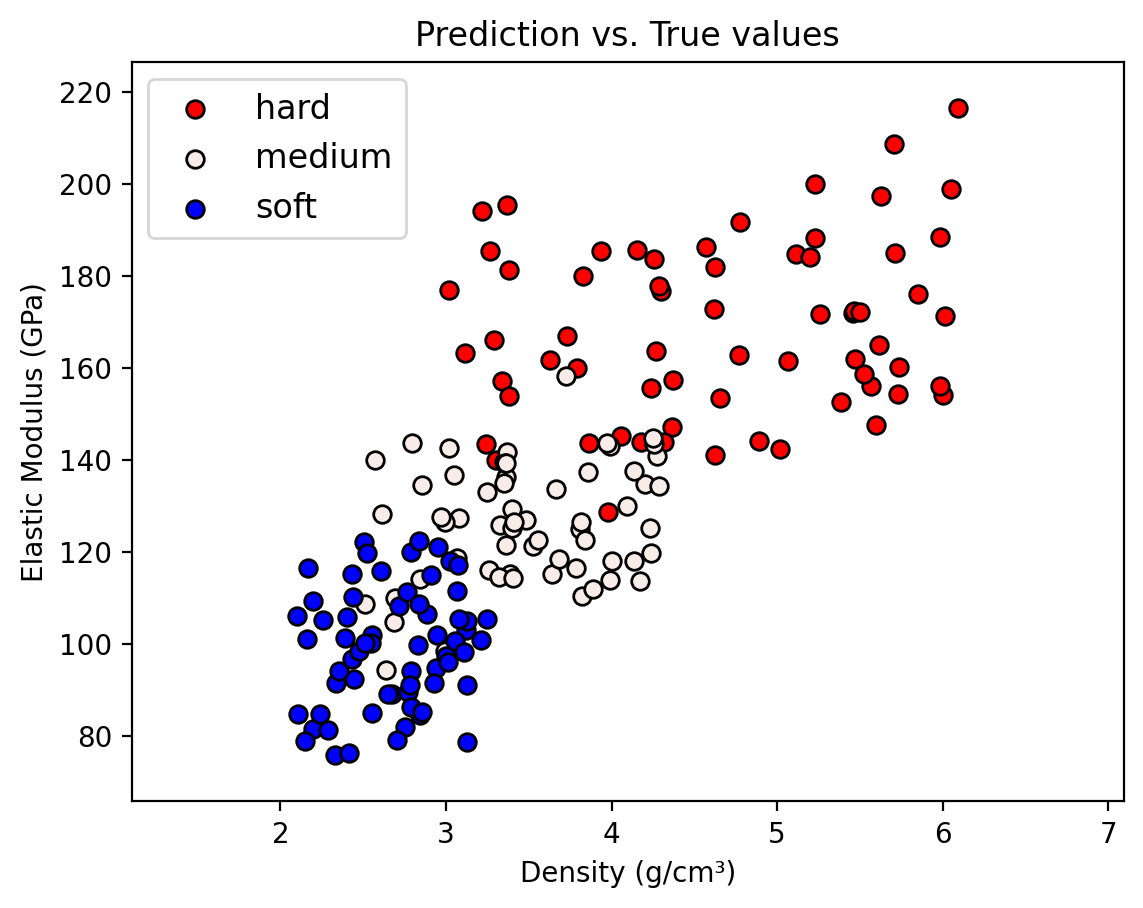

In [32]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#F8ECE8", "#0000FF"])

figure = plt.figure(dpi=200)
ax = plt.subplot(1, 1, 1)
# Plot the training points
ax.scatter(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], s=40, c='#FF0000', edgecolors="k", label='hard')
ax.scatter(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], s=40, c="#F8ECE8", edgecolors="k", label='medium')
ax.scatter(X_train[:, 0][y_train==2], X_train[:, 1][y_train==2], s=40, c="#0000FF", edgecolors="k", label='soft')
ax.legend(fontsize=12)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.title("Prediction vs. True values")
plt.ylabel("Elastic Modulus (GPa)")
plt.xlabel("Density (g/cm³)")

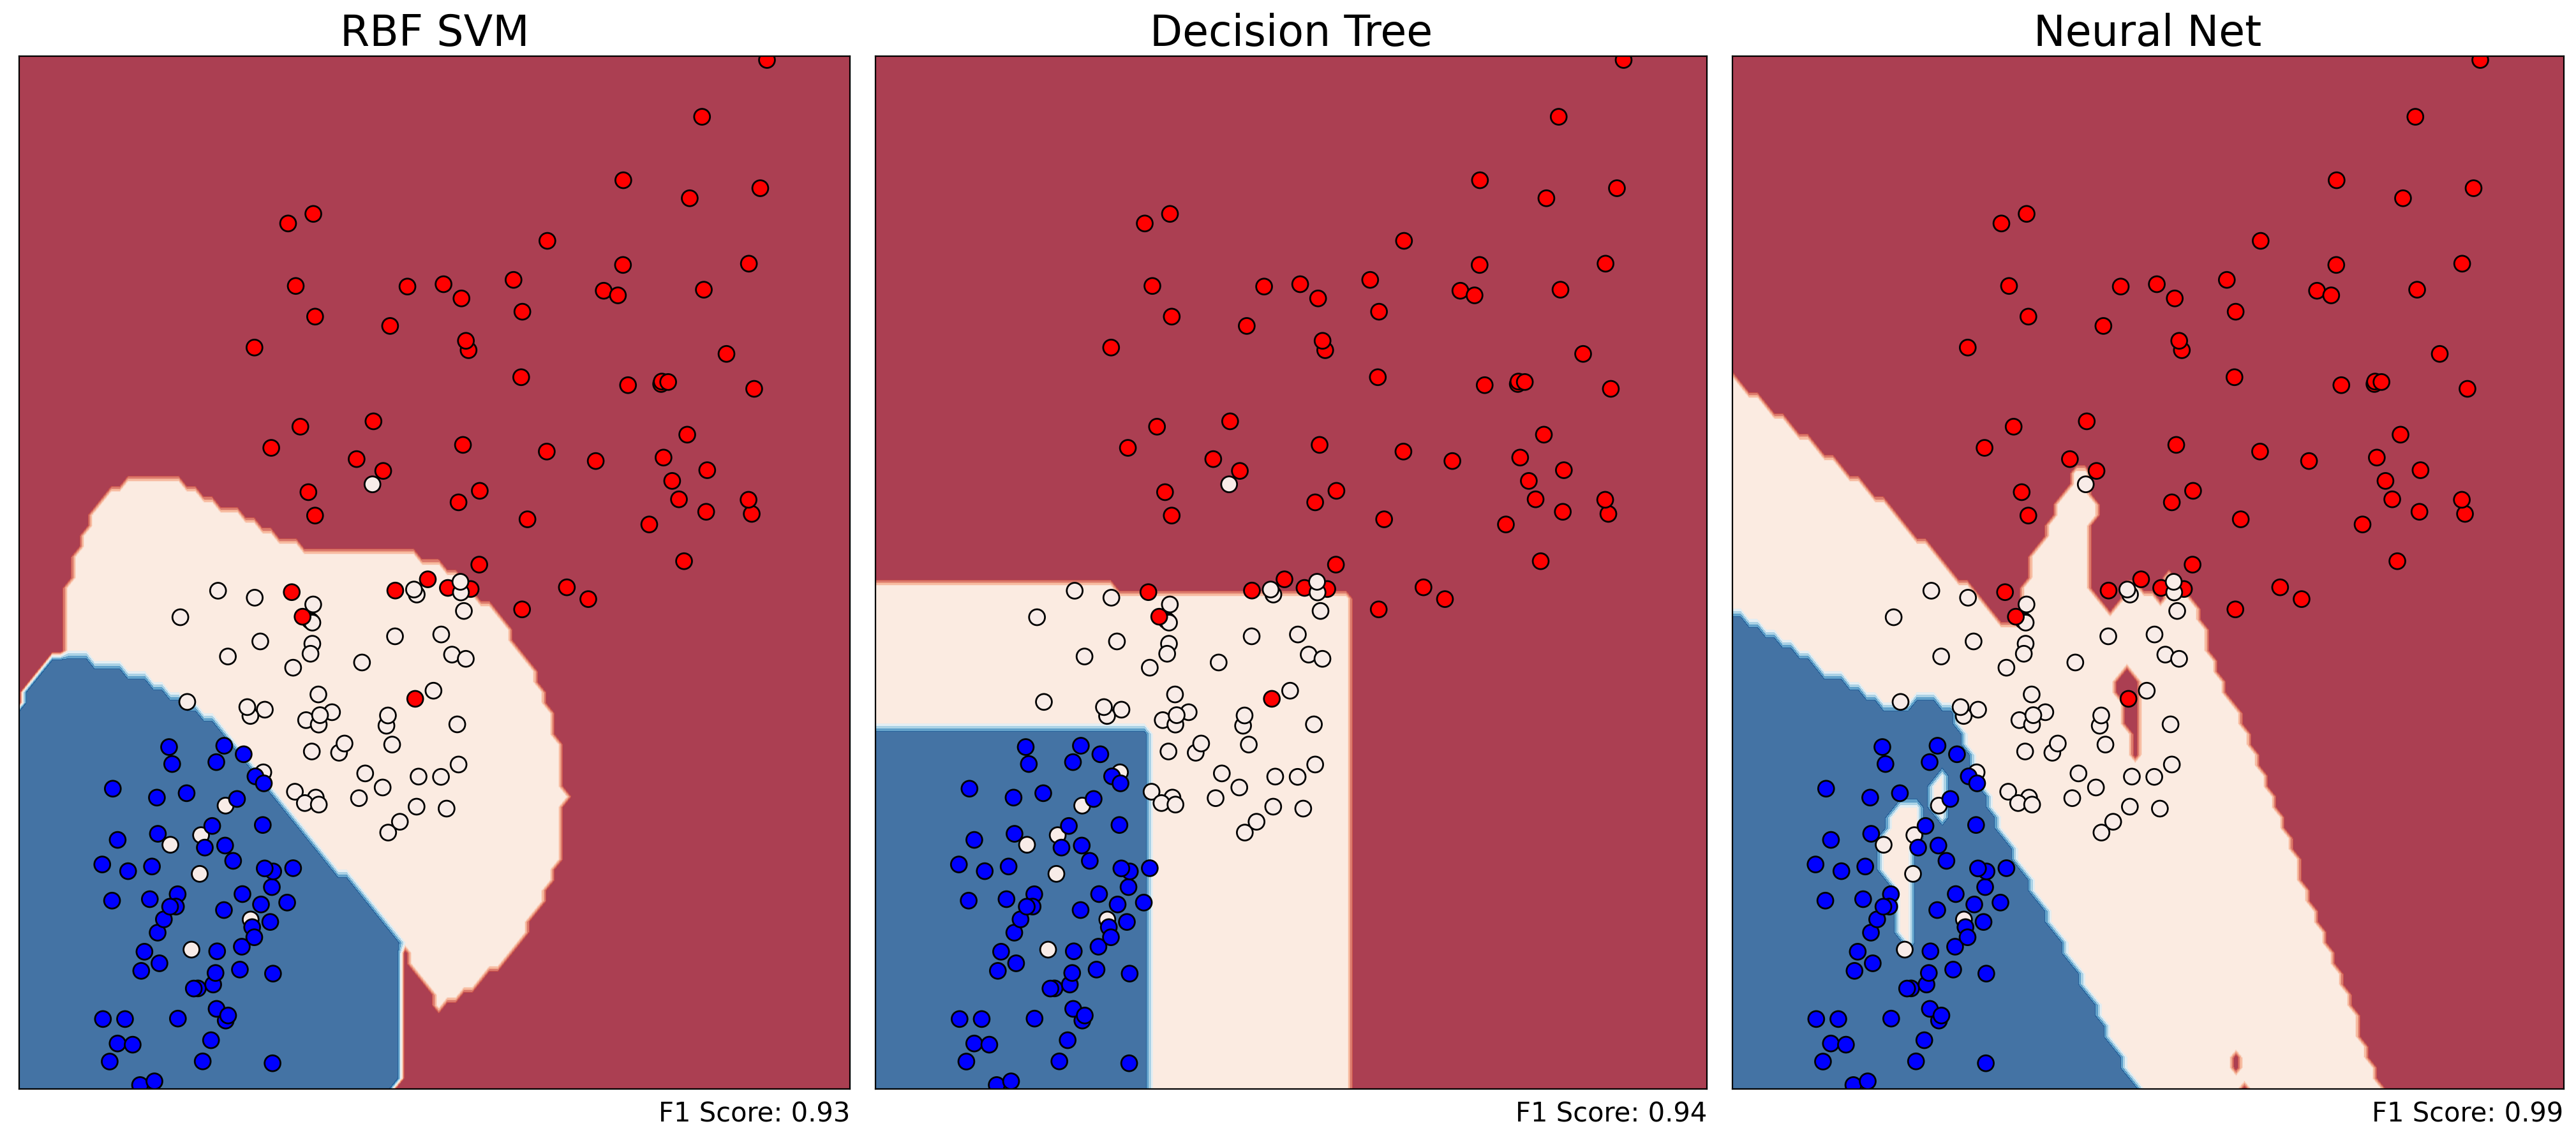

In [55]:
# plotting
# Code source: Gaël Varoquaux
#               Andreas Müller

figure = plt.figure(figsize=(27, 9), dpi=200)

# just plot the dataset first
i = 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)

    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_train, y_train)
    DecisionBoundaryDisplay.from_estimator(clf, X_train, cmap=cm, alpha=0.8, ax=ax, eps=0.5)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=80, cmap=cm_bright, edgecolors="k")

    ax.set_xticks(())
    ax.set_yticks(())

    ax.set_title(name, fontdict={'fontsize':24})
    ax.text(x_max - 0.5, y_min + 5, ("F1 Score: %.2f" % score).lstrip("0"), size=15,horizontalalignment="right",)
    
    i += 1


plt.tight_layout()
plt.show()

# Visualize the decision tree

[]

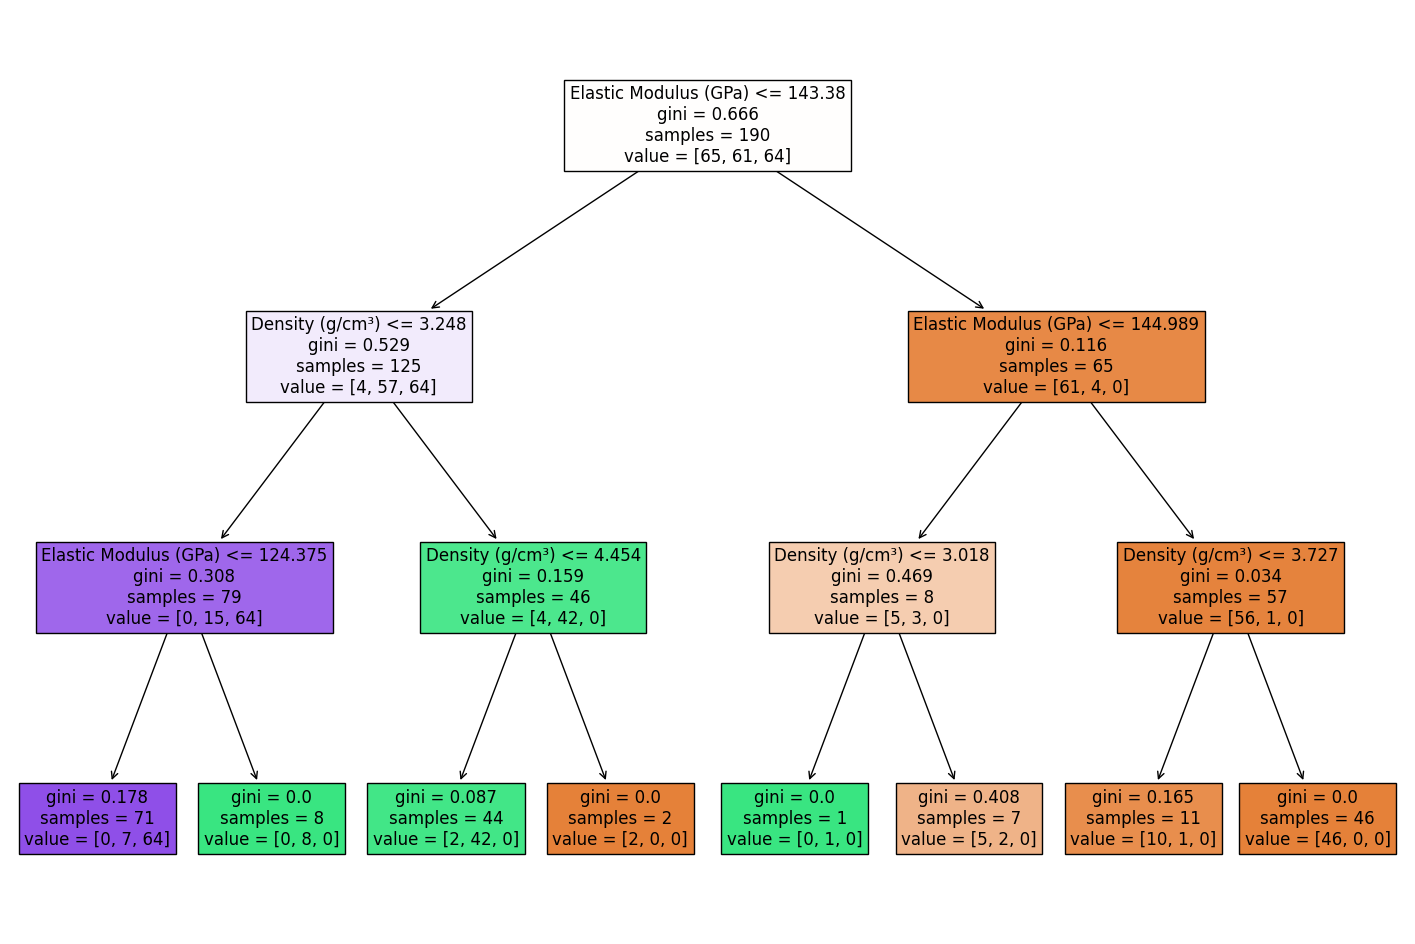

In [60]:
from sklearn import tree

clf = classifiers[1]
clf.fit(X_train, y_train)
feature_names = data.columns.tolist()[0: 2]

plt.figure(figsize=(18,12))
tree.plot_tree(clf, fontsize=12, filled = True, feature_names=feature_names)
plt.plot()

# homework: try more classifiers in sci-kitlearn

In [36]:

# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025, random_state=42),
#     SVC(gamma=2, C=1, random_state=42),
#     GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
#     DecisionTreeClassifier(max_depth=5, random_state=42),
#     RandomForestClassifier(
#         max_depth=5, n_estimators=10, max_features=1, random_state=42
#     ),
#     MLPClassifier(alpha=1, max_iter=1000, random_state=42),
#     AdaBoostClassifier(algorithm="SAMME", random_state=42),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
# ]